importing dependenciies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix


In [2]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [3]:
import cv2

In [4]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [5]:
type(X_train)

numpy.ndarray

In [6]:
print("shape of X_train: ", X_train.shape)
print("shape of Y_train: ", Y_train.shape)
print("shape of X_test: ", X_test.shape)
print("shape of Y_test: ", Y_test.shape)

shape of X_train:  (60000, 28, 28)
shape of Y_train:  (60000,)
shape of X_test:  (10000, 28, 28)
shape of Y_test:  (10000,)


Here 60000 represent no. of X_train datasets or images
and 28, 28 is the dimension of greyscale image pixels
whare values range from 0 to 255

0 ---> pixel is completely black
255 ---> pixel is completely white

In [7]:
print ('The first element of X_train is: ', X_train[0])

The first element of X_train is:  [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0 

In [8]:
print ('The first element of Y_train is: ', Y_train[0])

The first element of Y_train is:  5


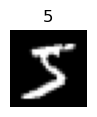

In [9]:
fig = plt.figure(figsize=(1, 1))
plt.imshow(X_train[0], cmap='gray')
plt.title(f"{Y_train[0]}")
plt.axis('off')
plt.show()

In [10]:
#unique values in Y_train and Y_test
print(np.unique(Y_train))
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [11]:
#scaling the data
#converting the value from between 0 to 255 to 0 to 1 by dividing each value by 255

X_train = X_train/255
X_test = X_test/255

In [12]:
print ('The first element of X_train after scaling is: ')
print(X_train[0])

The first element of X_train after scaling is: 
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.     

**Building the neural network**

In [13]:
model = keras.Sequential([
                 keras.layers.Flatten(input_shape=(28,28)),
                 keras.layers.Dense(50, activation='relu'),
                 keras.layers.Dense(50, activation='relu'),
                 keras.layers.Dense(10, activation='sigmoid')
])

In [14]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics='accuracy'
)

model.fit(
    X_train,Y_train,epochs=40
)

Epoch 1/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2966 - accuracy: 0.9150
Epoch 2/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1438 - accuracy: 0.9575
Epoch 3/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1067 - accuracy: 0.9674
Epoch 4/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0860 - accuracy: 0.9735
Epoch 5/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0712 - accuracy: 0.9774
Epoch 6/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0605 - accuracy: 0.9814
Epoch 7/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0512 - accuracy: 0.9836
Epoch 8/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0454 - accuracy: 0.9854
Epoch 9/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0397 - accuracy: 0.9871
Epoch 10/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.035

Training data accuracy = 99.77%

**Evaluating model on Test Data**

In [15]:
loss, accuracy = model.evaluate(X_train, Y_train)
print(accuracy)

1875/1875 [==============================] - 2s 1ms/step - loss: 0.0052 - accuracy: 0.9983
0.9983166456222534


Test data accuracy = 99.88%

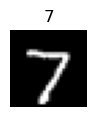

In [16]:
#first data point in X_test
fig = plt.figure(figsize=(1, 1))
plt.imshow(X_test[0], cmap='gray')
plt.title(f"{Y_test[0]}")
plt.axis('off')
plt.show()

prediction for first data point in X_test


In [17]:
Y_pred = model.predict(X_test)

313/313 [==============================] - 0s 833us/step


In [54]:
print(Y_pred[0])

[1.0275127e-16 3.0965627e-08 3.3864158e-04 9.5766431e-01 1.7741764e-10
 1.6767273e-06 7.0345797e-19 1.0000000e+00 4.8082238e-05 1.0470036e-01]


model.predict() gives the prediction probability of each class for that data point

In [18]:
#converting the prediction probabilities into labels
label_for_first_test_image = np.argmax(Y_pred[0])
print(label_for_first_test_image)

7


In [20]:
#converting the prediction probabilities into labels for all test data points
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 1, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 8, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 2, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 3, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 3, 4, 7, 6, 4, 9, 0, 5, 8, 5, 6, 6, 5, 2, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 3, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 1, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 5, 5, 2, 5, 9, 2, 9, 3, 8, 4, 2, 0, 7, 1, 1, 2, 1, 

Y_test ---> True labels,              
Y_pred_labels ---> predicted labels

Confusion matrix

In [21]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)

In [22]:
print(conf_mat)

tf.Tensor(
[[ 974    0    0    1    0    1    1    2    1    0]
 [   0 1124    0    0    1    0    2    1    7    0]
 [   5   34  980    2    1    1    2    2    5    0]
 [   0    1   27  960    0    6    0    5    9    2]
 [   1    0    2    1  966    1    5    1    0    5]
 [   2    6    3   56    3  804    5    1    6    6]
 [  28    1    3    1   11   20  893    0    1    0]
 [   1    7   62   14    8    1    0  927    2    6]
 [   8    1    7    7    5    4    2    8  931    1]
 [   1    2    2    8   27    7    2    6    4  950]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

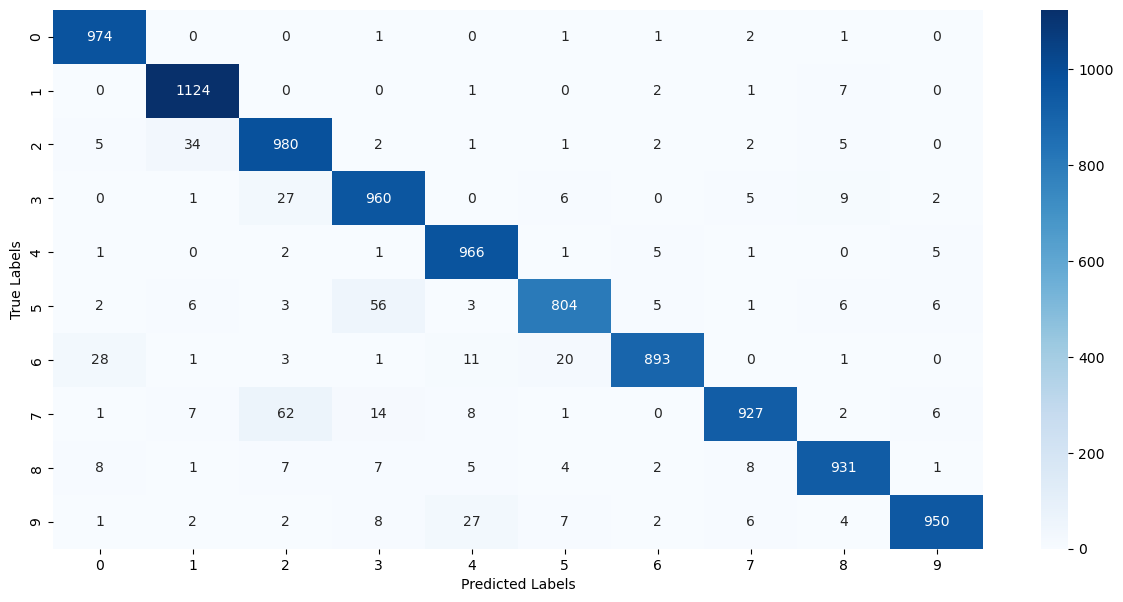

In [23]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

In [107]:
input_image_path = 'C:/Users/manra/OneDrive/Pictures/myImage_bw.jpg' #path of a test image from your system

input_image = cv2.imread(input_image_path)

In [108]:
type(input_image)

numpy.ndarray

In [109]:
print(input_image)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


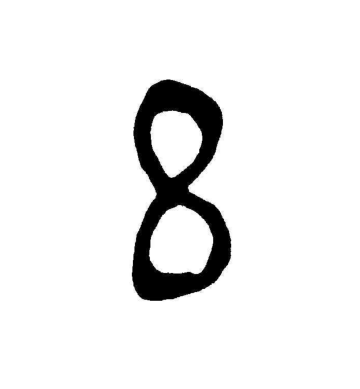

In [110]:
plt.imshow(input_image, cmap='gray')

plt.axis('off')
plt.show()

In [111]:
input_image.shape

(719, 663, 3)

In [112]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [113]:
grayscale.shape

(719, 663)

In [114]:
input_image_resize = cv2.resize(grayscale, (28,28))

In [115]:
input_image_resize.shape

(28, 28)

In [116]:
input_image_resize = 255 - input_image_resize

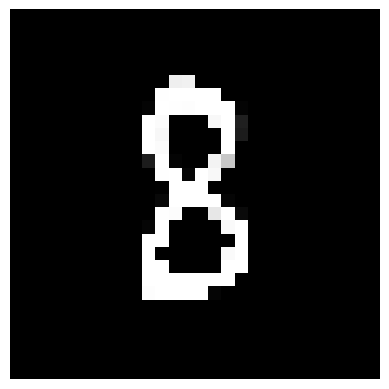

In [117]:
plt.imshow(input_image_resize, cmap='gray')

plt.axis('off')
plt.show()

In [118]:
print(input_image_resize)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 239 241   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 254 255 255 255 255   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   4 255 254 253 255 255 255   4
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 255 251   0   0   0 24

In [119]:
input_image_resize = input_image_resize/255

In [120]:
print(input_image_resize)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

reshaping the given array or vector to convert it into a n dimensional array so that neural network can predict the array

In [121]:
image_reshaped = np.reshape(input_image_resize, [1, 28, 28])

In [122]:
image_reshaped.shape

(1, 28, 28)

In [123]:
type(image_reshaped)

numpy.ndarray

In [124]:
type(input_image_resize)

numpy.ndarray

In [125]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 [==============================] - 0s 19ms/step
[[1.47073995e-04 2.84652645e-03 9.99931037e-01 1.24397516e-01
  4.19572731e-15 7.01926410e-06 6.26729297e-06 2.30852753e-01
  9.99993920e-01 4.36140035e-05]]


In [126]:
input_pred_label = np.argmax(input_prediction)

In [127]:
print(input_pred_label)

8


In [ ]:
#take path of image from user
input_image_path = input("Enter path of image: ")

#convert image to numpy array
input_image = cv2.imread(input_image_path)

#display the image
plt.imshow(input_image, cmap='gray')
plt.axis('off')
plt.show()

#convert the image frm rgb to grayscale
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

#resize the image 
input_image_resize = cv2.resize(grayscale, (28,28))

#scale the values
input_image_resize = input_image_resize/255

#reshape the data to n dimensional array
image_reshaped = np.reshape(input_image_resize, [1, 28, 28])

#predict the probabilities for each class
input_prediction = model.predict(image_reshaped)

#predict the label for each class
input_pred_label = np.argmax(input_prediction)

print("The handwritten image is recognised as ", input_pred_label)